Primeramente se extrerán los menajes y los labels del dataframe, los labels tipo string se codificarán utilizando codifiación binaria. 
- 0 para ham.
- 1 para sapam.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [3]:
lbl = df['v1'].tolist()
lbls = []

for i in lbl:
    if i == 'ham':
        lbls.append(0)
    else:
        lbls.append(1)
msg = df['v2'].tolist()

dict = {'mssg': msg, 'label' : lbls}

df = pd.DataFrame(dict)
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Luego, se procede a utilizar un vectorizador de frecuencia inversa utilizando la n-gramas de tamaño 1.

In [4]:
vec_transformer = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english')
vec_data = vec_transformer.fit_transform(df['mssg'].tolist())

In [5]:
train_df = pd.DataFrame(vec_data.toarray(), columns=vec_transformer.get_feature_names())
train_df['label'] = df['label']

train_df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

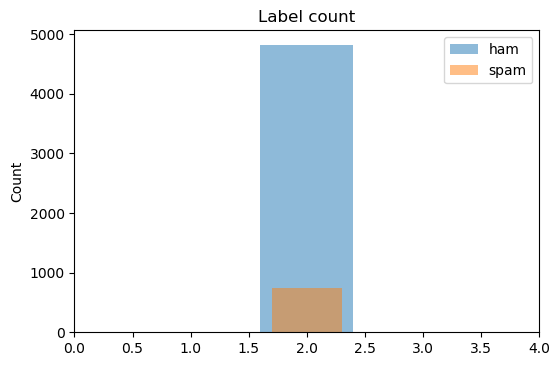

In [7]:
x1 = len(train_df[train_df.label == 0])
x2 = len(train_df[train_df.label == 1])

import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.title('Label count')
plt.bar(2, x1, 0.8, alpha=0.5, label='ham', )
plt.bar(2, x2, 0.6, alpha=0.5, label='spam')
plt.xlim((0, 4))
plt.ylabel('Count')
plt.legend()

Al graficar los datos se observa que se encuentran desbalanceados, por esta razón se procede a balancearlos utilizando la técnicas de undersampling sobre la clase ham.

In [8]:
df0 = train_df[train_df.label == 0].sample(1000, replace=False)
df1 = train_df[train_df.label == 1]

train_df = pd.concat([df0, df1], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)

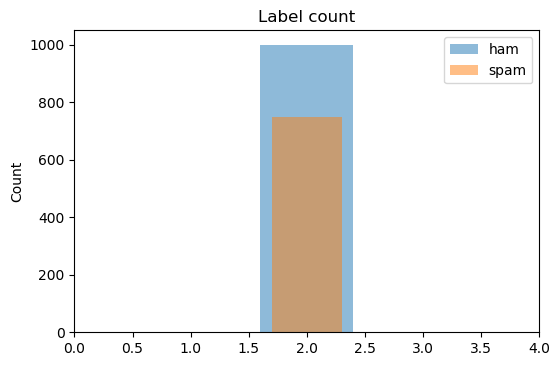

In [9]:
x1 = len(train_df[train_df.label == 0])
x2 = len(train_df[train_df.label == 1])


plt.figure(dpi=100)
plt.title('Label count')
plt.bar(2, x1, 0.8, alpha=0.5, label='ham', )
plt.bar(2, x2, 0.6, alpha=0.5, label='spam')
plt.xlim((0, 4))
plt.ylabel('Count')
plt.legend()

Con los datos balanceados se procede a entrenar 3 modelos de clasificiación:
- Regresión logística
- Máquinas de soporte vectorial
- Bosques aleatorios

Sobre estos modelos se evaluarán las siguientes métricas:
- Precision
- Accuracy
- F1 score
- Recall
- Confusion Matrix

1747
1600


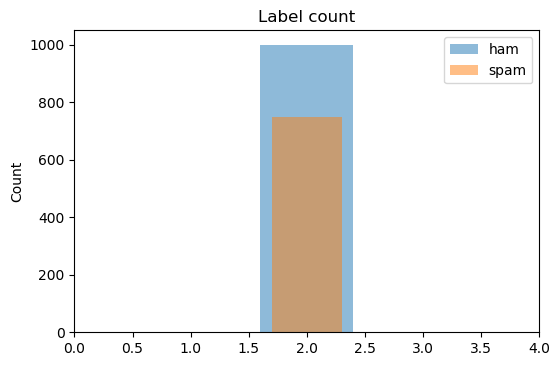

In [10]:
print(len(train_df['label']))

train_df = train_df.drop_duplicates()
print(len(train_df['label']))
plt.figure(dpi=100)
plt.title('Label count')
plt.bar(2, x1, 0.8, alpha=0.5, label='ham', )
plt.bar(2, x2, 0.6, alpha=0.5, label='spam')
plt.xlim((0, 4))
plt.ylabel('Count')
plt.legend()


In [11]:
X = train_df.loc[:, (train_df.columns != 'label')].values
x_train, x_test, y_train, y_test = train_test_split(X, train_df['label'], test_size=0.33)

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [13]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

print(f'Acurracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Acurracy: 0.9318181818181818
Precision: 0.9753086419753086
F1: 0.8977272727272727
Recall: 0.8315789473684211
Confusion Matrix:
[[334   4]
 [ 32 158]]


A las SVM se le ajusta el parámetro de permisibilidad utilizando validación cruzada.

In [15]:
import numpy as np
C = 10 ** np.arange(0, 5)
f1 = []
for i in C:
    print('Ajustando')
    svc = SVC(C=i, kernel='rbf')
    svc.fit(x_train, y_train)
    f1.append(f1_score(y_test, svc.predict(x_test)))
f1

Ajustando
Ajustando
Ajustando
Ajustando
Ajustando


[0.8746803069053708,
 0.8944723618090452,
 0.8944723618090452,
 0.8944723618090452,
 0.8944723618090452]

In [17]:
svc = SVC(C=10, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [18]:
print(f'Acurracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Acurracy: 0.9259962049335864
Precision: 0.9830508474576272
F1: 0.8992248062015504
Recall: 0.8285714285714286
Confusion Matrix:
[[314   3]
 [ 36 174]]


Y se utiliza GridSearch Cross Validation para ajustar los siguientes paráetros del clasificador bosque aleatorio:
- Número de estimadores
- Máxima profundidad

In [25]:
from sklearn.model_selection import GridSearchCV
estimators = 10 ** np.arange(0, 4)
depth = 4 ** np.arange (1, 5)

parm_dict = {'n_estimators':estimators, 'max_depth':depth}

grid = GridSearchCV(RandomForestClassifier(), param_grid=parm_dict, cv=8)
grid.fit(x_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

([<matplotlib.axis.YTick at 0x22221923e48>,
 <a list of 4 Text yticklabel objects>)

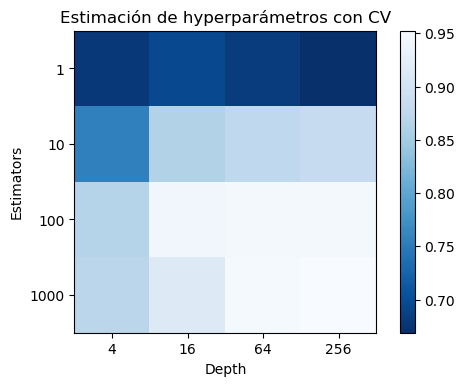

In [27]:
score_dict = grid.cv_results_
scores = [x for x in score_dict['mean_test_score']]
socres = np.array(scores).reshape(len(estimators), len(depth))

#Graficación de los resultados
plt.figure(dpi=100)
plt.title('Estimación de hyperparámetros con CV')
plt.imshow(socres, interpolation='nearest', cmap=plt.cm.Blues_r)
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.colorbar()
plt.xticks(np.arange(len(depth)), depth)
plt.yticks(np.arange(len(estimators)), estimators)

In [23]:
rf = RandomForestClassifier(1000, max_depth=64)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [24]:
print(f'Acurracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Acurracy: 0.9507575757575758
Precision: 0.9939759036144579
F1: 0.9269662921348315
Recall: 0.868421052631579
Confusion Matrix:
[[337   1]
 [ 25 165]]


In [37]:
import numpy as np
import time
i = 10
f1rf = []
f1sv = []
while i != 0:
    x_train, x_test, y_train, y_test = train_test_split(X, train_df['label'], test_size=0.33, random_state=int(time.time()))
    print(np.mean(x_test))
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    svc.fit(x_train, y_train)
    y_pred2 = svc.predict(x_test)
    f1rf.append(f1_score(y_test, y_pred))
    f1sv.append(f1_score(y_test, y_pred2))
    i-=1
    

0.00034490305796826336
0.0003368282739739159
0.0003412702637361497
0.00034090138903648424
0.0003336518738772708
0.0003411314792558341
0.0003433711011839658
0.000343091862063425
0.000340599036378512
0.00033995889629399265


NameError: name 'f1rf' is not defined

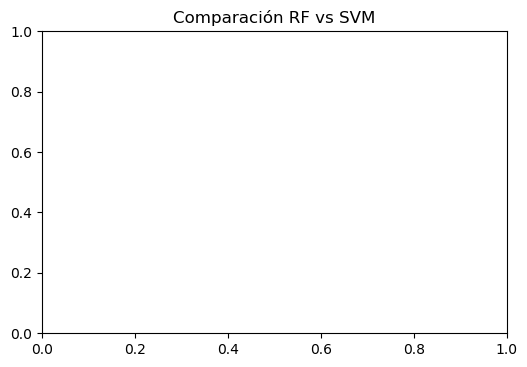

In [30]:
plt.figure(dpi=100)
plt.title('Comparación RF vs SVM')
plt.plot(range(len(f1rf)), f1rf, alpha=0.5, label='Random Forest')
plt.plot(range(len(f1rf)), f1sv, alpha=0.5, label= 'SVM')
plt.ylim((0.8, 1))
plt.xlabel('Corridas')
plt.ylabel('F1') 
plt.legend()
print("Medias de ajuste",np.mean(f1rf), np.mean(f1sv))
print("Std de ajuste",np.std(f1rf), np.std(f1sv))

